# Homework 01 - Implementing and Training an MLP

### 1. Packages

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random
from random import randint
import math

### 2. Multi-Layer Perceptron


#### 2.1. Data

[([[157, 35, 45, 55, 33, 76, 108, 206],
   [5, 128, 8, 162, 176, 120, 67, 201],
   [90, 219, 177, 232, 182, 139, 229, 61],
   [73, 98, 75, 225, 140, 193, 193, 195],
   [1, 164, 214, 250, 201, 86, 181, 61],
   [61, 117, 95, 2, 40, 223, 45, 39],
   [189, 217, 123, 250, 3, 18, 158, 105],
   [21, 157, 196, 185, 238, 181, 48, 6]],
  [5, 8, 3, 8, 7, 1, 4, 5]),
 ([[12, 53, 152, 26, 54, 214, 130, 76],
   [182, 204, 64, 60, 241, 156, 233, 218],
   [26, 219, 136, 163, 152, 86, 90, 52],
   [206, 73, 214, 26, 221, 31, 190, 225],
   [16, 111, 169, 2, 57, 153, 156, 239],
   [46, 16, 171, 164, 218, 71, 141, 178],
   [130, 175, 139, 74, 252, 180, 224, 228],
   [83, 162, 57, 196, 207, 182, 28, 232]],
  [8, 1, 3, 5, 5, 8, 9, 1]),
 ([[110, 94, 13, 237, 87, 220, 32, 45],
   [105, 193, 114, 120, 217, 136, 80, 132],
   [75, 134, 64, 126, 157, 184, 26, 174],
   [99, 132, 64, 197, 1, 228, 234, 173],
   [87, 59, 40, 212, 169, 202, 243, 124],
   [183, 86, 68, 253, 244, 58, 64, 47],
   [166, 61, 145, 194, 194, 9

<Figure size 640x480 with 0 Axes>

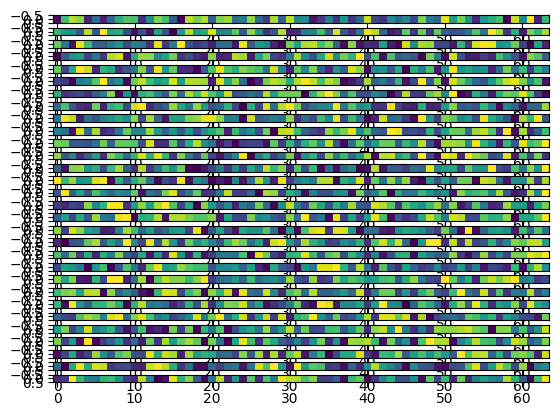

In [2]:
# load data
x = 30

def make_data(x):
    t = []
    input = []
    for i in range(x):
        d = list(list(randint(0,255) for i in range(8)) for ii in range(8))
        target = list(randint(0,9) for i in range(8))
        input.append(d)
        t.append(tuple((d, target)))
    return input, t
# print(t)
input, tup = make_data(x)

# print(tup)
oneHot = []
# # make tuples
# for i in range(len(t[0])):
#     # print(t[0][i])
#     # print(t[1][i])
#     # tup = tuple((t[0][i].append([i])))
#     tup = t[0][i]
#     # tup.append(t[1][i])
#     # print(tup)
#     oneHot.append(tup)

# print(tuples)

# Plot images
plt.figure()
n = 5
# y = x//n
# if y*n != x:
#     y += 1
# f, ax = plt.subplots(y, n)
f, ax = plt.subplots(x, 1)
ax = ax.flatten()
for i, it in enumerate(ax):
    if i == x:
        break
    # it.imshow(np.array(input[i]))
    s64 = np.array(input[i]).reshape((1, 64))
    it.imshow(np.array(s64))
    
def generator(tuples, minibatchsize=10):
    random.shuffle(tuples)
    return tuples

generator(tup)
# plt.imshow()
# s64 = np.array(input).reshape((1,64))
# plt.imshow(np.array(s64))

#### 2.2. Sigmoid Activation Function

In [3]:
class sigmoidAF:
    # inputs = ndarrays[minibatchsize, num_units]
    def __init__(self, inputs, num):
        self.inputs = inputs
        self.sigmoid = 1 // (1 + np.exp(-num))
    def get_value(self):
        return self.sigmoid


#### 2.3. Softmax activation function

In [4]:
class softmax:
    def __init__(self, input, target):
        # k = size of input vector
        k = len(input)
        zi = 1
        s = []
        for j in range(k):
            # z = preactivation
            zj = target[j]
            s.append(np.exp(zj))
        self.value = np.exp(zi)//sum(s)
        # print("calculation done")
        # print(self.value)
    
    def get_value(self):
        # print("in get")
        # print(self.value)
        return self.value
# print(input[0])
# print(len(target))
print(len(tup[0]))
for i in range(len(tup[0])):
    print(softmax(input[i], tup[1][i]).get_value())

2
[0. 0. 0. 0. 0. 0. 0. 0.]
0.0


#### 2.4. MLP weights

In [5]:
class MLPweights:
    '''
    variables: 
    - activation function: (sigmoidAF, softmax)
    - perceptrons: number of units in this layer
    - input size: number of units in the preceding layer
    - weights: tuple with both mu and sigma (default values set to mu=0. and sigma=0.2)
    - bias: default value set to 0
    '''
    def __init__(self, act_funct, perceptrons, input_size, weights=(0.,0.2), bias=0):
        self.self = self
        self.act_funct = act_funct
        self.perceptrons = perceptrons
        self.input_size = input_size
        self.mu = weights[0]
        self.sigma = weights[1]
        self.mbsize = []

    def get_mbsize(self):
        return np.array(self.mbsize)

    '''
    variables: input: ndarray(minibatchsize, input_size)
    
    return: ndarray with applied weights
    
    '''  
    def forward(self, input):
        mbsize = []
        num_units = 0
        # print("In forward")
        for x in input[0]:
            # print("in for loop")
            # print("x: ", x)
            # print("input[1] list: ", input[1])
            print(mbsize)
            for y in input[1]:
                multipl = x*y
                # print("multipl: ", multipl)
                self.mbsize.append(multipl)
            num_units += 1
        return mbsize, num_units

# print(tup[0][1])
# mlp = MLPweights((tup[0][i], tup[1][i]))
# for i in range(len(tup[0])):
#     mlp = MLPweights((0,0), 0, 0)
#     if i == 0:
#         mlp = MLPweights((tup[0][i], tup[1][i]), len(tup[0][i]), len(tup[0][i]))
#     else: 
#         mlp = MLPweights((tup[0][i], tup[1][i]), len(tup[0][i]), len[0][i-1])
            
#     print(mlp.forward((tup[0][i], tup[1][i])))

#### 2.5. Putting together the MLP

In [6]:
class MLP:
    def __init__(self, input, layers, size_layers):
        self.self = self
        self.input = input
        self.layers = layers
        self.size_layers = size_layers
        self.activation = softmax(input[0], input[1])
        self.values = []
        self.MLP = []
        self.dBack = [{}] * self.size_layers
        for i in range(len(input[0])):
            MLPw = MLPweights(self.activation, self.layers, self.size_layers)
            self.values.append(MLPw)
            
    def get_values(self):
        return np.ndarray(self.values)


#### 2.6. CCE Loss function

In [7]:
class Loss_funct:
    def __init__(self, true, predicted):
        self.self = self
        self.true = true
        self.predicted = predicted
        self.loss = 0
        self.bloss = 0
        self.cross_entropy(self.true, self.predicted)
        
    def cross_entropy(self, tru, pred):
        print(tru)
        for i in range(len(tru)):
            self.loss -= tru[i] * np.log(pred[i])
        return self.loss

### 3. Backpropagation

#### 3.1. CCE Backwards

In [8]:
'''
variables: 
- pred: inputs prediction of shape (minibatch_size, 10)
- loss: LCCE of shape (minibatch_size, 1)

return: matrix of shape (minibatch_size, 1)
'''
class Back_loss(Loss_funct):
    def CCE_back(self):
        self.bloss = self.loss/np.diff(self.predicted)
        return self.bloss

#### 3.2. Sigmoid Backwards

In [9]:
'''
child class of sigmoidAF with parent properties + back_sigmoid() function

variables: 
- preactivation: shape (minibatch_size, num_units)
- activation: 
- erSignal: error signal (dL/dactivation)

return: sigmoid backwards function result
'''
class back_sigmoid(sigmoidAF):
    def back_sigmoid(self, erSignal):
        preactivation = self.inputs # list
        activation = self.sigmoid # integer 1 or 0
        loss = erSignal.CCE_back()
        return (activation//np.diff(preactivation))*loss

#### 3.3. MLP Layer weights backwards

In [10]:
'''
child class of MLPweights with parent properties + back_weights() function

variables: 

return: 
'''
class back_MLPweight(MLPweights):
    def back_weights(self, dLdpre, preactivation):
        # dLdpre = back_sigmoid(preactivation, activation, erSignal)
        dpre = np.diff(preactivation)
        dweights = np.diff(self.get_mbsize()[:len(dpre)+1])
        dLdW = dpre * (dpre/dweights)
        print(self.perceptrons)
        dLdInput = dLdpre * (np.diff(preactivation)/self.perceptrons)
        return dLdW, dLdInput

#### 3.4. MLP Layer backwards

In [11]:
'''
function
'''
def back_Layer(self, preactivation, activation, erSignal):
    bSig = back_sigmoid(preactivation, activation, erSignal)
    return back_MLPweight(bsig, preactivation)

#### 3.5. Gradient Tape and MLP backward

In [12]:
'''
child class of MLP

variables: 
- input: 
'''
import string
class BackMLP(MLP):
    def back_MLP(self):
        for i in range(len(self.input[0])):
            activ = back_sigmoid((self.input[0][i], self.input[1][i]), self.input[0][i])
            if i > 0:
                print("backMLP: ", self.input[i])
                erSignal = Back_loss(self.input[i], self.input[i-1])
                self.dBack[i] = {i:erSignal}
                activation = activ.back_sigmoid(erSignal)
                bMLPw = back_MLPweight(activ, len(self.input[i]), len(self.input[i-1]))
                # print("bMLPw: ", bMLPw)
                print("input[i]", self.input[i])
                print("input[i-1]", self.input[i-1])
                wValues, num = bMLPw.forward((self.input[i], self.input[i-1]))
                print("weight values: ", wValues, "num: ", num)
                bMLP, dLdInput = bMLPw.back_weights(activation, self.input[i])
                print("backMLP: ", bMLP)
                self.MLP.append(bMLP)
        

#### 3.6. Training

In [13]:
def training(mbs):
    print(len(mbs[0][0]))
    for i in range(len(mbs[0][0])):
        bMLP = BackMLP(mbs[0][i], mbs[1][i], len(mbs[1][i]))
        bmlp = bMLP.back_MLP()
        # print("bmlp length: ", len(bMLP))
        # print("bmlp: ", bMLP)
        # print("mbs length: ", len(mbs[0][i]))   
        # print("mbs: ", mbs[0][i])
        loss = Loss_funct(bmlp, bMLP.dBack[{i}])
        print("loss: ", string(loss))
        print("epoch: ", string(i))
        

In [14]:
training(tup)

8
backMLP:  [5, 128, 8, 162, 176, 120, 67, 201]
[5, 128, 8, 162, 176, 120, 67, 201]
input[i] [5, 128, 8, 162, 176, 120, 67, 201]
input[i-1] [157, 35, 45, 55, 33, 76, 108, 206]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [-24.80163934 288.         474.32        -1.78181818  14.58604651
  17.55625     36.64489796]
backMLP:  [90, 219, 177, 232, 182, 139, 229, 61]
[90, 219, 177, 232, 182, 139, 229, 61]
input[i] [90, 219, 177, 232, 182, 139, 229, 61]
input[i-1] [5, 128, 8, 162, 176, 120, 67, 201]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [ 1.50325203 -0.16333333  0.21825397  1.98412698 -0.36686508 -1.69811321
  2.34029851]
backMLP:  [73, 98, 75, 225, 140, 193, 193, 195]
[73, 98, 75, 225, 140, 193, 193, 195]
input[i] [73, 98, 75, 225, 140, 193, 193, 195]
input[i-1] [90, 219, 177, 232, 182, 139, 229, 61]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [ 6.63693321e-02 -1.72537508e-01  5.60398506e+00 -1.97945205e+00
 -8.94870978e-01  0.000

C:\Users\erika\AppData\Local\Temp\ipykernel_3604\3355301021.py:10: RuntimeWarning: divide by zero encountered in divide
  self.bloss = self.loss/np.diff(self.predicted)
C:\Users\erika\AppData\Local\Temp\ipykernel_3604\2938845449.py:16: RuntimeWarning: invalid value encountered in multiply
  return (activation//np.diff(preactivation))*loss
C:\Users\erika\AppData\Local\Temp\ipykernel_3604\1753423004.py:13: RuntimeWarning: divide by zero encountered in divide
  dLdW = dpre * (dpre/dweights)


TypeError: list indices must be integers or slices, not set